In [90]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from Column import *
import re

### 📍 Reading Dataset

In [91]:
df = pd.read_csv("Dataset/amazon.csv")
df

,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19991,this app is fricken stupid.it froze on the kin...,0
19992,Please add me!!!!! I need neighbors! Ginger101...,1
19993,love it! this game. is awesome. wish it had m...,1
19994,I love love love this app on my side of fashio...,1


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [93]:
df.describe(include="object")

,Text
count,19996
unique,19996
top,This game is a rip off. Here is a list of thin...
freq,1


In [94]:
df.isnull().sum()

Text     0
label    0
dtype: int64

In [95]:
df.duplicated().sum()

np.int64(0)

In [96]:
df["label"].value_counts()

label
1    15230
0     4766
Name: count, dtype: int64

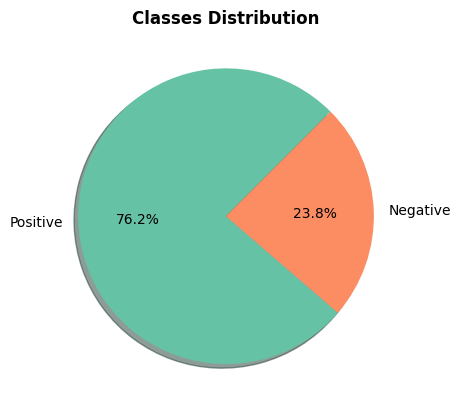

In [97]:
counts = df["label"].value_counts().to_numpy()

colors = sns.color_palette('Set2', len(df))
plt.title("Classes Distribution",weight="bold")
plt.pie(x=counts,labels=["Positive","Negative"],colors=colors,rotatelabels=False,autopct="%1.1f%%",startangle=45,shadow=True)
plt.show()

### 🛠 Text Preprocessing 

> - **Column Class:** is used for update **`CleanedText Column`** without repeating Block of Code

In [98]:
df["CleanedText"] = df["Text"].apply(lambda e: e.lower())

In [99]:
text = column(Dataset=df,Column_name="CleanedText")

In [100]:
text.Update(func=lambda e: e.lower())
df

,Text,label,CleanedText
0,This is the best apps acording to a bunch of ...,1,this is the best apps acording to a bunch of ...
1,This is a pretty good version of the game for ...,1,this is a pretty good version of the game for ...
2,this is a really . there are a bunch of levels...,1,this is a really . there are a bunch of levels...
3,"This is a silly game and can be frustrating, b...",1,"this is a silly game and can be frustrating, b..."
4,This is a terrific game on any pad. Hrs of fun...,1,this is a terrific game on any pad. hrs of fun...
...,...,...,...
19991,this app is fricken stupid.it froze on the kin...,0,this app is fricken stupid.it froze on the kin...
19992,Please add me!!!!! I need neighbors! Ginger101...,1,please add me!!!!! i need neighbors! ginger101...
19993,love it! this game. is awesome. wish it had m...,1,love it! this game. is awesome. wish it had m...
19994,I love love love this app on my side of fashio...,1,i love love love this app on my side of fashio...


### 📍 Removing Any Single Letter

In [101]:
text.Update(func=lambda e:re.sub(pattern=r"\b[a-zA-Z]{1}\b",repl=" ",string=e))
df

,Text,label,CleanedText
0,This is the best apps acording to a bunch of ...,1,this is the best apps acording to bunch of ...
1,This is a pretty good version of the game for ...,1,this is pretty good version of the game for ...
2,this is a really . there are a bunch of levels...,1,this is really . there are bunch of levels...
3,"This is a silly game and can be frustrating, b...",1,"this is silly game and can be frustrating, b..."
4,This is a terrific game on any pad. Hrs of fun...,1,this is terrific game on any pad. hrs of fun...
...,...,...,...
19991,this app is fricken stupid.it froze on the kin...,0,this app is fricken stupid.it froze on the kin...
19992,Please add me!!!!! I need neighbors! Ginger101...,1,please add me!!!!! need neighbors! ginger101...
19993,love it! this game. is awesome. wish it had m...,1,love it! this game. is awesome. wish it had m...
19994,I love love love this app on my side of fashio...,1,love love love this app on my side of fashio...


### 📍 Removing Any Single Letter

In [102]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

### 📍 Tokenizing 

In [103]:
text.Update(func=lambda e:word_tokenize(text=e))
df

,Text,label,CleanedText
0,This is the best apps acording to a bunch of ...,1,"[this, is, the, best, apps, acording, to, bunc..."
1,This is a pretty good version of the game for ...,1,"[this, is, pretty, good, version, of, the, gam..."
2,this is a really . there are a bunch of levels...,1,"[this, is, really, ., there, are, bunch, of, l..."
3,"This is a silly game and can be frustrating, b...",1,"[this, is, silly, game, and, can, be, frustrat..."
4,This is a terrific game on any pad. Hrs of fun...,1,"[this, is, terrific, game, on, any, pad, ., hr..."
...,...,...,...
19991,this app is fricken stupid.it froze on the kin...,0,"[this, app, is, fricken, stupid.it, froze, on,..."
19992,Please add me!!!!! I need neighbors! Ginger101...,1,"[please, add, me, !, !, !, !, !, need, neighbo..."
19993,love it! this game. is awesome. wish it had m...,1,"[love, it, !, this, game, ., is, awesome, ., w..."
19994,I love love love this app on my side of fashio...,1,"[love, love, love, this, app, on, my, side, of..."


### 📍 Removing **Stop Words**

In [104]:
en_stopwords = stopwords.words("english")
negation_words = {"not", "no", "nor", "don't", "won't", "aren't", "couldn't", "didn't", "doesn't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "needn't", "shan't", "shouldn't", "wasn't", "weren't", "wouldn't"}
en_stopwords = [word for word in en_stopwords if word not in negation_words]

def Remove_stopwords(words:list[str]):
    return [word for word in words if word not in en_stopwords]

In [105]:
text.Update(func=lambda x:Remove_stopwords(x))
df

,Text,label,CleanedText
0,This is the best apps acording to a bunch of ...,1,"[best, apps, acording, bunch, people, agree, b..."
1,This is a pretty good version of the game for ...,1,"[pretty, good, version, game, free, ., lots, d..."
2,this is a really . there are a bunch of levels...,1,"[really, ., bunch, levels, find, golden, eggs,..."
3,"This is a silly game and can be frustrating, b...",1,"[silly, game, frustrating, ,, lots, fun, defin..."
4,This is a terrific game on any pad. Hrs of fun...,1,"[terrific, game, pad, ., hrs, fun, ., grandkid..."
...,...,...,...
19991,this app is fricken stupid.it froze on the kin...,0,"[app, fricken, stupid.it, froze, kindle, wont,..."
19992,Please add me!!!!! I need neighbors! Ginger101...,1,"[please, add, !, !, !, !, !, need, neighbors, ..."
19993,love it! this game. is awesome. wish it had m...,1,"[love, !, game, ., awesome, ., wish, free, stu..."
19994,I love love love this app on my side of fashio...,1,"[love, love, love, app, side, fashion, story, ..."


### 📍 Lemmatization Words

In [106]:
lemma = WordNetLemmatizer()

def lemmatize(Words:list[str]):
    return [lemma.lemmatize(word=word,pos="v") for word in Words]

In [107]:
text.Update(func=lambda e:lemmatize(e))
df

,Text,label,CleanedText
0,This is the best apps acording to a bunch of ...,1,"[best, apps, acording, bunch, people, agree, b..."
1,This is a pretty good version of the game for ...,1,"[pretty, good, version, game, free, ., lot, di..."
2,this is a really . there are a bunch of levels...,1,"[really, ., bunch, level, find, golden, egg, ...."
3,"This is a silly game and can be frustrating, b...",1,"[silly, game, frustrate, ,, lot, fun, definite..."
4,This is a terrific game on any pad. Hrs of fun...,1,"[terrific, game, pad, ., hrs, fun, ., grandkid..."
...,...,...,...
19991,this app is fricken stupid.it froze on the kin...,0,"[app, fricken, stupid.it, freeze, kindle, wont..."
19992,Please add me!!!!! I need neighbors! Ginger101...,1,"[please, add, !, !, !, !, !, need, neighbor, !..."
19993,love it! this game. is awesome. wish it had m...,1,"[love, !, game, ., awesome, ., wish, free, stu..."
19994,I love love love this app on my side of fashio...,1,"[love, love, love, app, side, fashion, story, ..."


### 📍 Trans List to String 

In [108]:
def to_String(Words:list[str]):
    return " ".join(Words)

In [109]:
text.Update(func=lambda x:to_String(x))
df

,Text,label,CleanedText
0,This is the best apps acording to a bunch of ...,1,best apps acording bunch people agree bomb egg...
1,This is a pretty good version of the game for ...,1,pretty good version game free . lot different ...
2,this is a really . there are a bunch of levels...,1,really . bunch level find golden egg . super f...
3,"This is a silly game and can be frustrating, b...",1,"silly game frustrate , lot fun definitely reco..."
4,This is a terrific game on any pad. Hrs of fun...,1,terrific game pad . hrs fun . grandkids love ....
...,...,...,...
19991,this app is fricken stupid.it froze on the kin...,0,app fricken stupid.it freeze kindle wont allow...
19992,Please add me!!!!! I need neighbors! Ginger101...,1,please add ! ! ! ! ! need neighbor ! ginger101...
19993,love it! this game. is awesome. wish it had m...,1,love ! game . awesome . wish free stuff house ...
19994,I love love love this app on my side of fashio...,1,love love love app side fashion story no fight...


### 📍 Removing any Punctuation

In [110]:
text.Update(func=lambda e:re.sub(pattern=r"[^a-zA-Z]",repl=" ",string=e))
df

,Text,label,CleanedText
0,This is the best apps acording to a bunch of ...,1,best apps acording bunch people agree bomb egg...
1,This is a pretty good version of the game for ...,1,pretty good version game free lot different ...
2,this is a really . there are a bunch of levels...,1,really bunch level find golden egg super f...
3,"This is a silly game and can be frustrating, b...",1,silly game frustrate lot fun definitely reco...
4,This is a terrific game on any pad. Hrs of fun...,1,terrific game pad hrs fun grandkids love ...
...,...,...,...
19991,this app is fricken stupid.it froze on the kin...,0,app fricken stupid it freeze kindle wont allow...
19992,Please add me!!!!! I need neighbors! Ginger101...,1,please add need neighbor ginger ...
19993,love it! this game. is awesome. wish it had m...,1,love game awesome wish free stuff house ...
19994,I love love love this app on my side of fashio...,1,love love love app side fashion story no fight...


## 🟢 From Here We Build Model

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.utils.class_weight import compute_class_weight

In [112]:
x = df["CleanedText"]
y = df["label"]

In [113]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.1,shuffle=True,random_state=42)

### 🟢 Convert text to numerical format using **TF-IDF**

In [114]:
tfidf = TfidfVectorizer(ngram_range=(1, 3),max_features=65000)

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf  = tfidf.transform(x_test)

In [115]:
print(f"🟢 Number of Features = {len(tfidf.get_feature_names_out())} Feature")

🟢 Number of Features = 65000 Feature


## ✅ Logestic Regression Model

In [116]:
lr = LogisticRegression(random_state=42,max_iter=1000,C=10,solver="saga")

lr.fit(x_train_tfidf,y_train)
y_predicted = lr.predict(x_test_tfidf)

In [117]:
lr_acc = accuracy_score(y_true=y_test,y_pred=y_predicted)

print(f"The Accurecy of Logestic Regression = {lr_acc*100:0.2f} %")

The Accurecy of Logestic Regression = 90.85 %


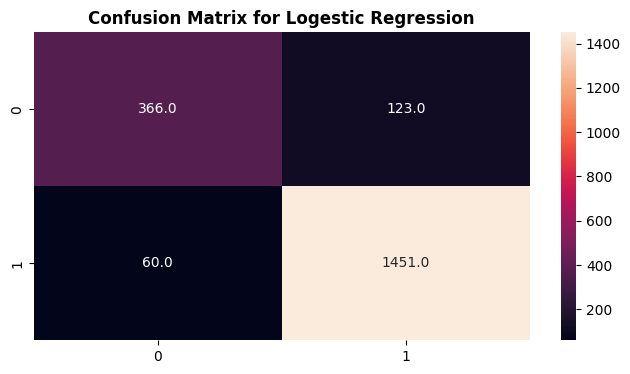

In [118]:
con = confusion_matrix(y_true=y_test,y_pred=y_predicted)

plt.figure(figsize=(8,4))
plt.title("Confusion Matrix for Logestic Regression",weight="bold")
sns.heatmap(data=con,annot=True,fmt="0.1f",xticklabels=np.unique(y))
plt.show()

In [119]:
print(classification_report(y_true=y_test,y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       489
           1       0.92      0.96      0.94      1511

    accuracy                           0.91      2000
   macro avg       0.89      0.85      0.87      2000
weighted avg       0.91      0.91      0.91      2000



## ✅ Logestic Regreesion with Class Weights to avoid **imbalance classes**

In [120]:
classweights = compute_class_weight(classes=np.unique(y),class_weight="balanced",y=y)
classweights = dict(zip(np.unique(y), classweights))
classweights

{np.int64(0): np.float64(2.0977759127150652),
 np.int64(1): np.float64(0.6564674983585029)}

In [121]:
lr = LogisticRegression(penalty="l2",random_state=42,class_weight=classweights,max_iter=1000,C=10,solver="sag")

lr.fit(x_train_tfidf,y_train)
y_predicted = lr.predict(x_test_tfidf)

In [122]:
weighted_lr = accuracy_score(y_true=y_test,y_pred=y_predicted)

print(f"The Accurecy of Weighted Logestic Regression = {weighted_lr*100:0.2f} %")

The Accurecy of Weighted Logestic Regression = 90.60 %


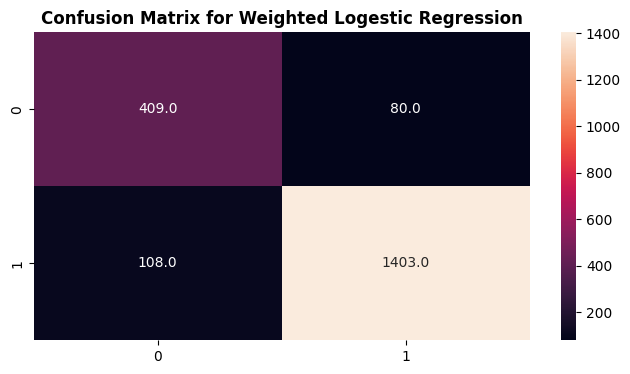

In [123]:
con = confusion_matrix(y_true=y_test,y_pred=y_predicted)

plt.figure(figsize=(8,4))
plt.title("Confusion Matrix for Weighted Logestic Regression",weight="bold")
sns.heatmap(data=con,annot=True,fmt="0.1f",xticklabels=np.unique(y))
plt.show()

In [124]:
print(classification_report(y_true=y_test,y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       489
           1       0.95      0.93      0.94      1511

    accuracy                           0.91      2000
   macro avg       0.87      0.88      0.88      2000
weighted avg       0.91      0.91      0.91      2000



## 🟢 Naive Bayes Model

In [125]:
naive = MultinomialNB()

naive.fit(x_train_tfidf,y_train)
y_predicted = naive.predict(x_test_tfidf)

In [126]:
naive_acc = accuracy_score(y_true=y_test,y_pred=y_predicted)

print(f"The Accurecy of Weighted Logestic Regression = {naive_acc*100:0.2f} %")

The Accurecy of Weighted Logestic Regression = 80.05 %


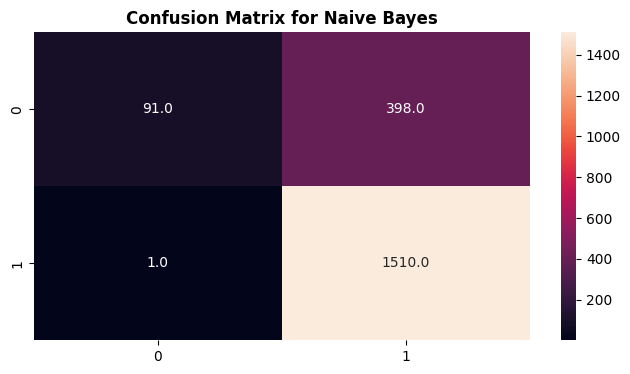

In [127]:
con = confusion_matrix(y_true=y_test,y_pred=y_predicted)

plt.figure(figsize=(8,4))
plt.title("Confusion Matrix for Naive Bayes",weight="bold")
sns.heatmap(data=con,annot=True,fmt="0.1f",xticklabels=np.unique(y))
plt.show()

In [128]:
print(classification_report(y_true=y_test,y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.19      0.31       489
           1       0.79      1.00      0.88      1511

    accuracy                           0.80      2000
   macro avg       0.89      0.59      0.60      2000
weighted avg       0.84      0.80      0.74      2000



### 💹 Comparison between Models

In [129]:
all_results = {"Logestic Regression":lr_acc,"Weighted Logestic Regression":weighted_lr,"Naive Bayes":naive_acc}

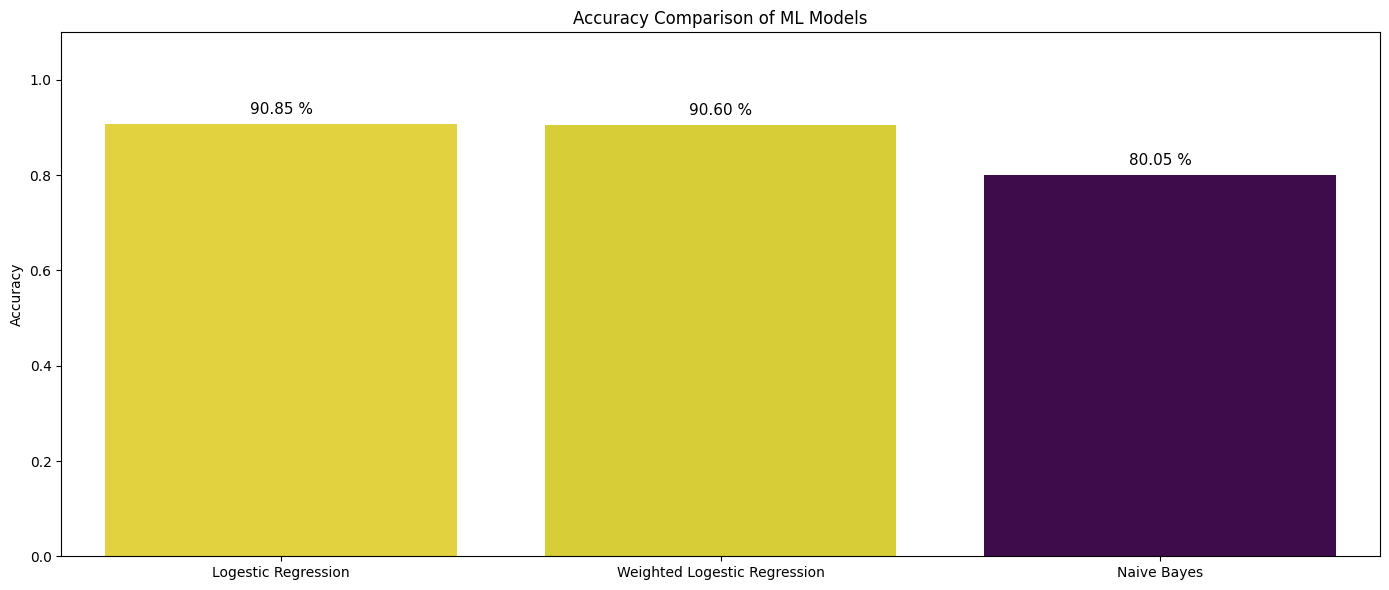

In [130]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=list(all_results.keys()),y=list(all_results.values()),palette="viridis",hue=list(all_results.values()),legend=False)
plt.title("Accuracy Comparison of ML Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.ylim(0, 1.1)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height*100:.2f} %",(p.get_x() + p.get_width() / 2, height),ha="center",va="bottom",fontsize=11,xytext=(0, 5),textcoords="offset points")

plt.tight_layout()
plt.grid(False)
plt.show()

### 🟢 Visualize the most frequent **Positive** and **Negative** words

In [131]:
def plot_feature_importance(model:LogisticRegression, vectorizer:TfidfVectorizer, top_n:int=20):
    feature_names = vectorizer.get_feature_names_out()
    coefficients = model.coef_.flatten()
    
    feat_df = pd.DataFrame({'Feature': feature_names,'Coefficient': coefficients})
    
    feat_df = feat_df.sort_values(by='Coefficient', ascending=False)
    
    top_pos = feat_df.head(top_n)
    top_neg = feat_df.tail(top_n)
    
    plot_df = pd.concat([top_pos, top_neg])
    
    plt.figure(figsize=(10, 12))
    
    colors = ['red' if c > 0 else 'green' for c in plot_df['Coefficient']]
    
    sns.barplot(x='Coefficient', y='Feature', data=plot_df, palette=colors,hue="Coefficient",legend=False)
    
    plt.title(f'Top {top_n} Most Influential Words', fontsize=15, weight='bold')
    plt.xlabel('Model Coefficient (Influence Strength)', fontsize=12)
    plt.ylabel('Word / N-Gram', fontsize=12)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8) 
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

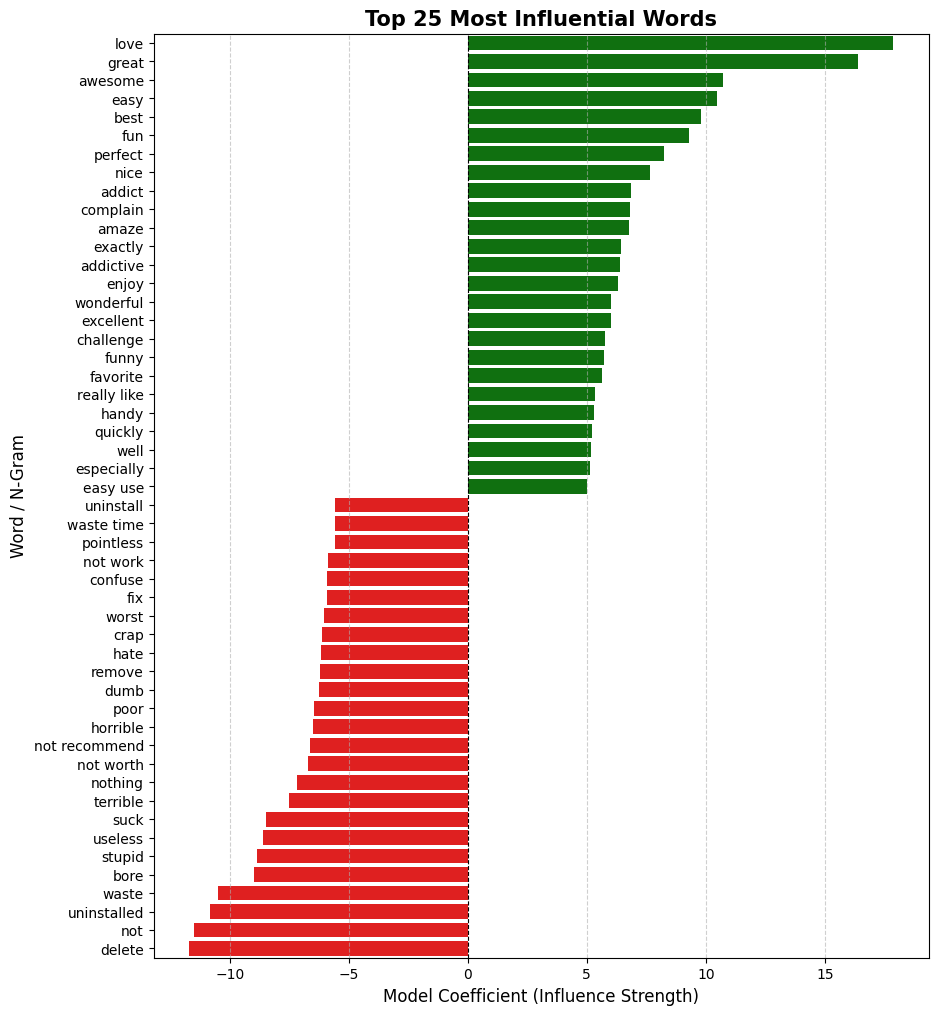

In [132]:
plot_feature_importance(model=lr,vectorizer= tfidf, top_n=25)

---

<h1 align="center">✅ The End of NoteBook</h1>


---